In [2]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from pymysql import connect
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
database =connect(host = 'localhost', 
                  user = 'root',
                  password = 'Ceaservyshu7&',
                  database = 'capstone_project')

In [5]:
cur = database.cursor()

In [6]:
query = 'SELECT * FROM home_loan_new_DTI1;'

cur.execute(query)

792

In [7]:
df = pd.read_sql(query, database)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_50500\305042412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, database)


In [8]:
# Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())

Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0      811  Female   19   < 20 years        Married                 3   
1     1232    Male   62  >= 60 years         Single                 2   
2      889    Male   22  20-30 years        Married                 0   
3      192  Female   20  20-30 years         Single                 1   
4     1185    Male   60  >= 60 years        Married                 0   

  educational_level employment_type geographical_location type_of_residence  \
0             Ph.D.        Salaried                 Urban             Owned   
1          Bachelor        Salaried                 Urban             Owned   
2            Master      Government                 Urban            Rented   
3            Master      Government                 Rural             Owned   
4             Ph.D.   Self-employed                 Urban      With Parents   

   ...  Loan_bins loan_term_yrs    term_bins  loan_

In [10]:
df.count()

loan_id                       752
gender                        752
age                           752
AgeGroup                      752
marital_status                752
no_of_dependents              752
educational_level             752
employment_type               752
geographical_location         752
type_of_residence             752
income_annum                  752
income_buckets                752
MonthlySalary                 752
monthly_obligations           752
DTI                           752
DTI_Value                     752
savings_account_balance       752
Savings_bins                  752
investment_portfolio_value    752
investment_bins               752
insurance_policies            752
insurance_bins                752
loan_amount                   752
Loan_bins                     752
loan_term_yrs                 752
term_bins                     752
loan_purpose                  752
approval_status               752
previous_loan_experience      752
credit_history

In [12]:
# Filter the DataFrame for CIBIL score bins between 600 and 649
filtered_df = df[(df['cibil_scorebins'] == '750-900: Excellent Score')]

# Use df.describe() to get summary statistics for the filtered data
print(filtered_df.describe())

           loan_id         age  no_of_dependents  income_annum  MonthlySalary  \
count   286.000000  286.000000        286.000000  2.860000e+02     286.000000   
mean    978.664336   41.877622          1.958042  1.167697e+06   97308.157343   
std     591.796444   13.731858          1.365613  4.952540e+05   41271.175108   
min       6.000000   18.000000          0.000000  3.029480e+05   25246.000000   
25%     460.500000   29.000000          1.000000  7.463505e+05   62195.750000   
50%     972.500000   42.500000          2.000000  1.189865e+06   99155.500000   
75%    1429.750000   54.000000          3.000000  1.621588e+06  135132.250000   
max    1997.000000   64.000000          4.000000  1.989947e+06  165829.000000   

       monthly_obligations  savings_account_balance  \
count           286.000000               286.000000   
mean          25333.381119            258338.010490   
std           14962.872183            145440.821732   
min              84.000000             10837.00000

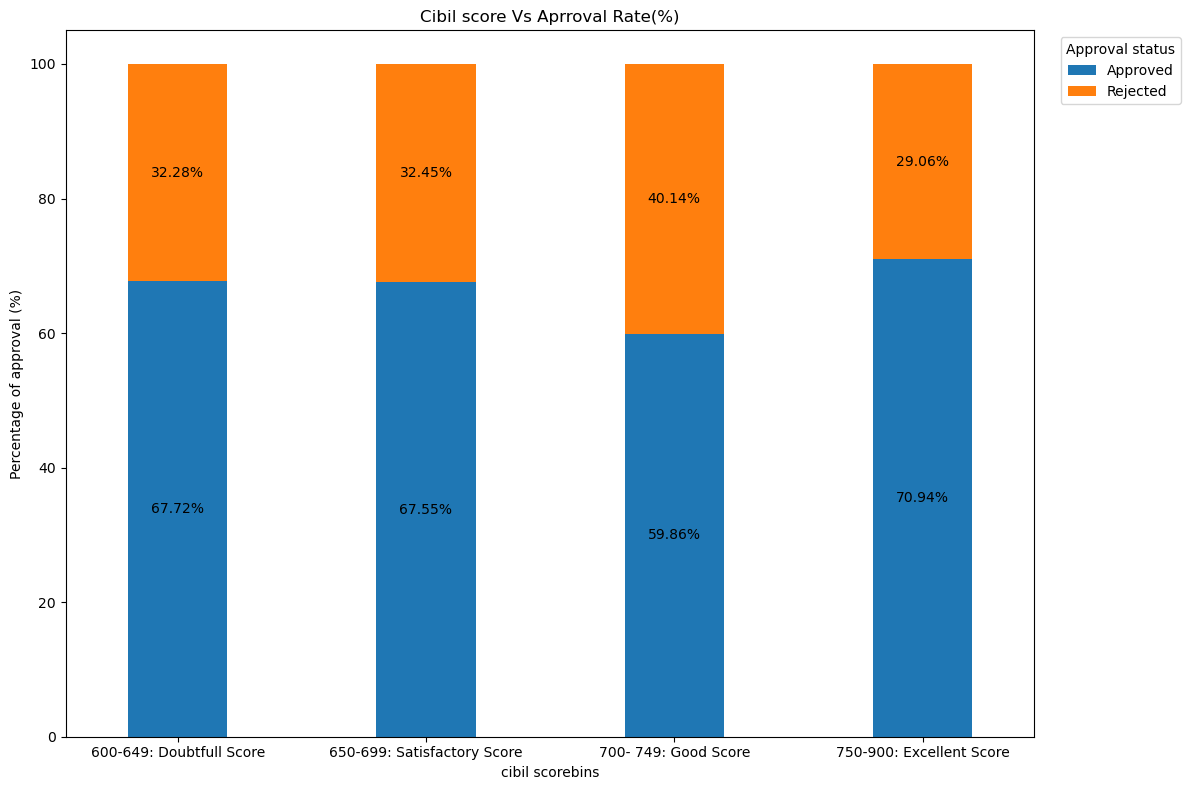

In [13]:
# Approval Rate Vs income bins
approval_rates = df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()
normalized_data=approval_rates.div(approval_rates.sum(axis=1),axis=0)*100
ax=normalized_data.plot(kind='bar',stacked=True,figsize=(12,8),width=0.4)


# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')
plt.xlabel('cibil scorebins')
plt.ylabel('Percentage of approval (%)')
plt.title('Cibil score Vs Aprroval Rate(%)')
plt.xticks(rotation=360)
        
# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

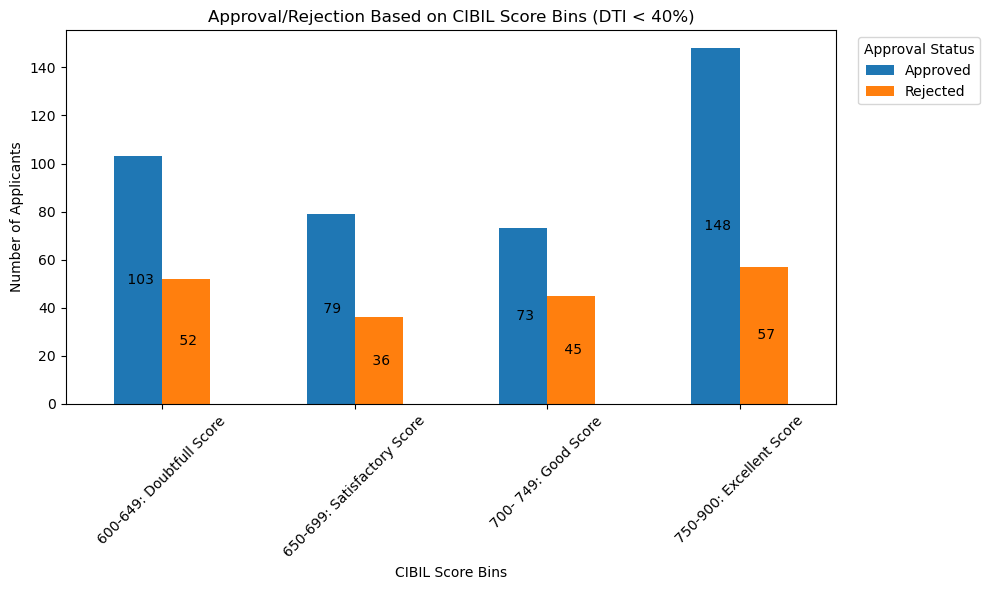

In [17]:
# Filter the DataFrame based on specified CIBIL score bins and DTI ratio
filtered_df = df[(df['DTI'] <= 43) & 
                 ((df['cibil_scorebins'] == '600-649: Doubtfull Score') | 
                  (df['cibil_scorebins'] == '650-699: Satisfactory Score') | 
                  (df['cibil_scorebins'] == '700- 749: Good Score') | 
                  (df['cibil_scorebins'] == '750-900: Excellent Score'))]

# Group by CIBIL score bins and approval status
approval_by_score_bins = filtered_df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_score_bins.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('CIBIL Score Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval/Rejection Based on CIBIL Score Bins (DTI < 40%)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

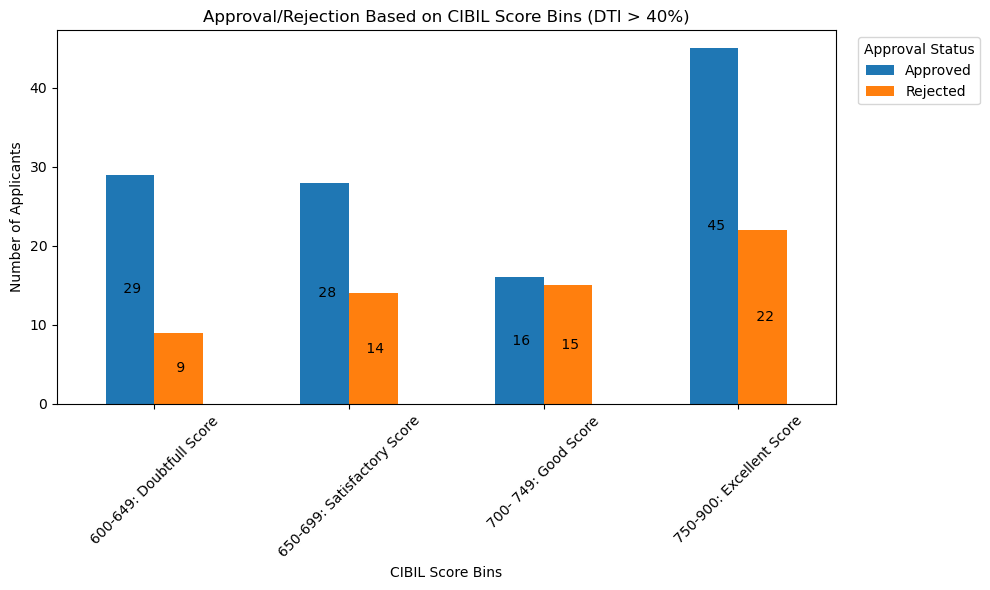

In [54]:
# Filter the DataFrame based on specified CIBIL score bins and DTI ratio
filtered_df = df[(df['DTI'] > 40) & 
                 ((df['cibil_scorebins'] == '600-649: Doubtfull Score') | 
                  (df['cibil_scorebins'] == '650-699: Satisfactory Score') | 
                  (df['cibil_scorebins'] == '700- 749: Good Score') | 
                  (df['cibil_scorebins'] == '750-900: Excellent Score'))]

# Group by CIBIL score bins and approval status
approval_by_score_bins = filtered_df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_score_bins.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('CIBIL Score Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval/Rejection Based on CIBIL Score Bins (DTI > 40%)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

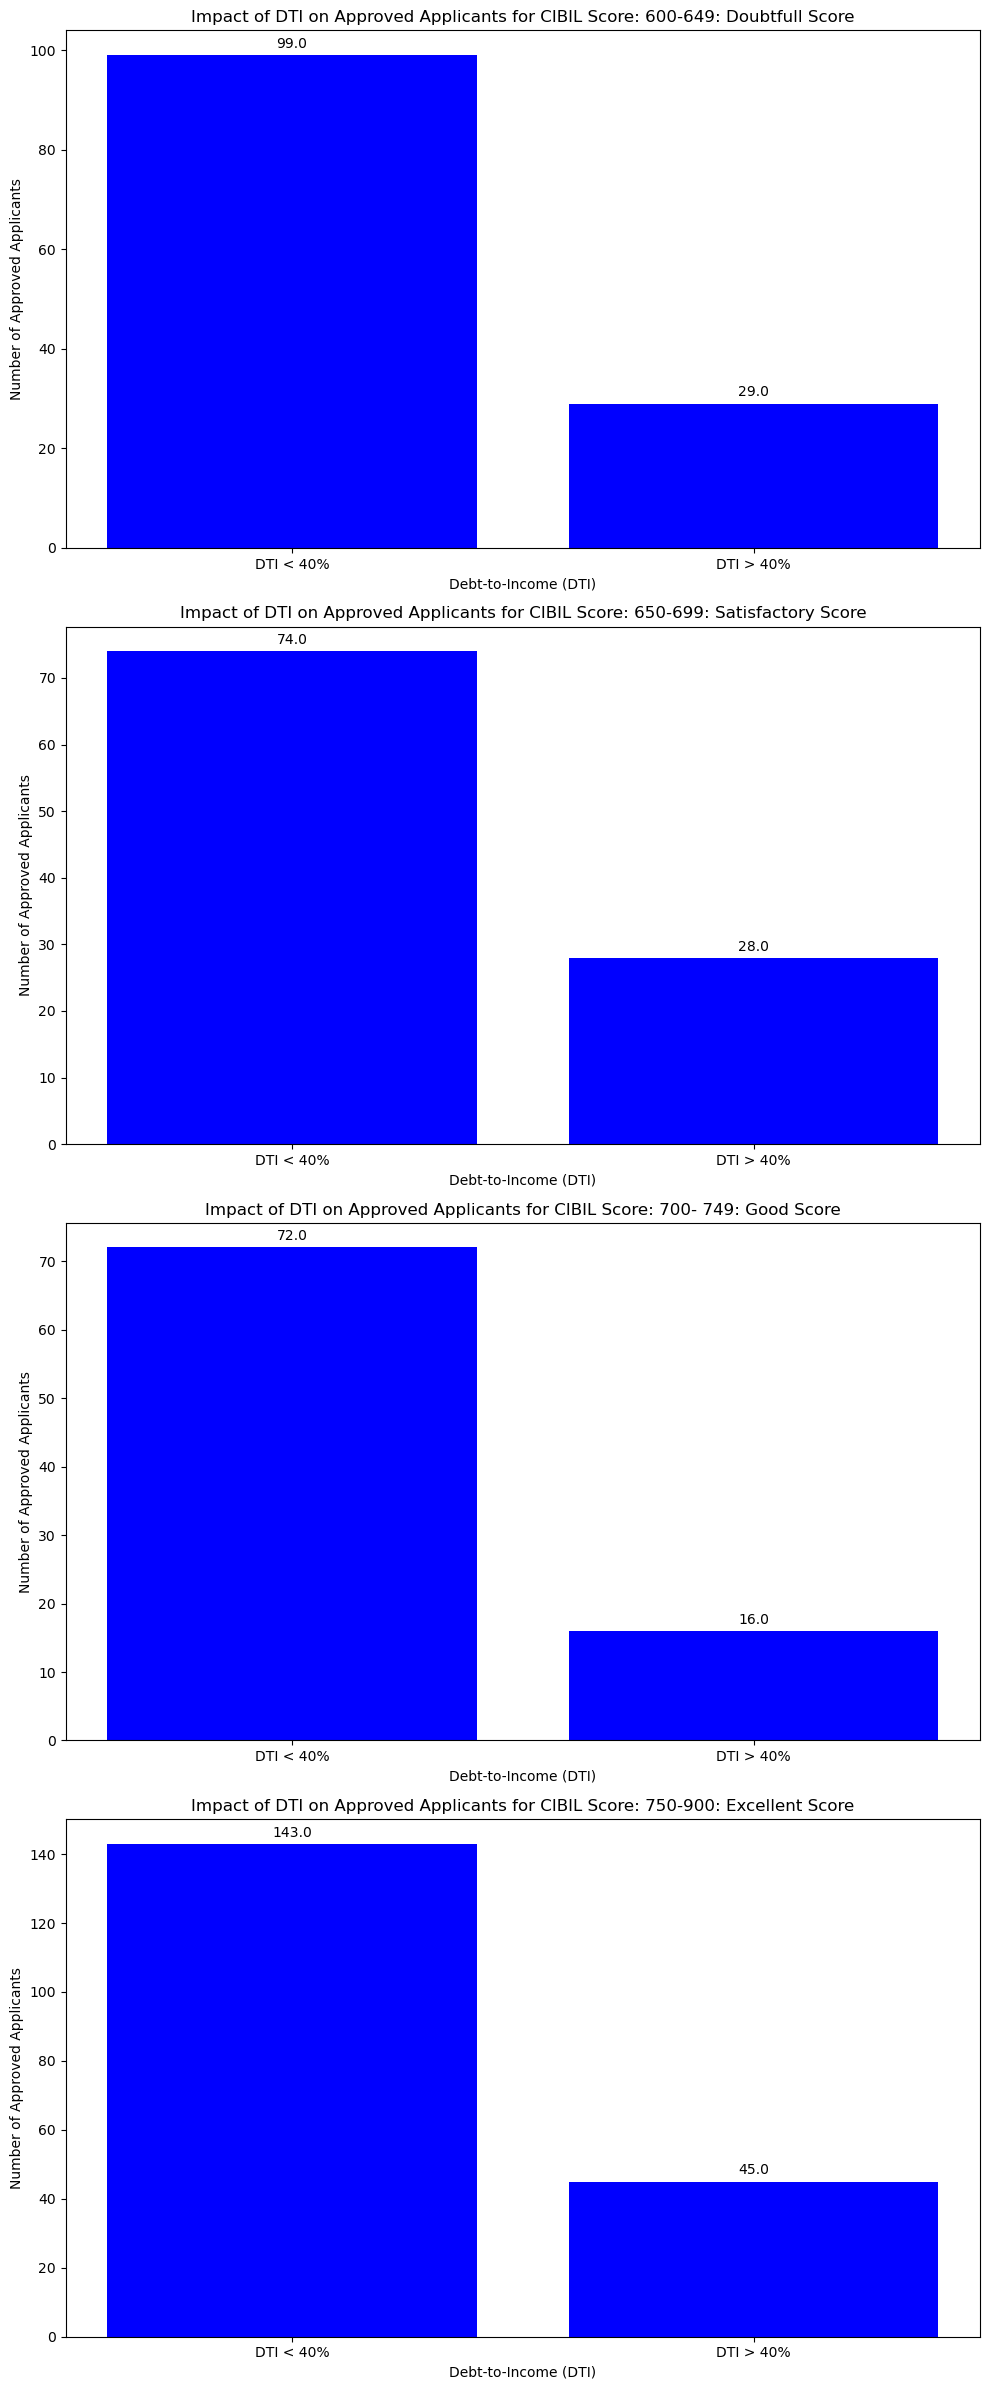

In [10]:


# Filter the DataFrame for the specified CIBIL score bins
cibil_scorebins = ['600-649: Doubtfull Score', '650-699: Satisfactory Score', '700- 749: Good Score', '750-900: Excellent Score']

# Create subplots for each CIBIL score bin
fig, axs = plt.subplots(nrows=len(cibil_scorebins), ncols=1, figsize=(10, 6*len(cibil_scorebins)))

for idx, score_bin in enumerate(cibil_scorebins):
    # Filter the DataFrame based on CIBIL score bin
    filtered_df = df[df['cibil_scorebins'] == score_bin]
    
    # Group by DTI and approval status
    approval_by_dti = filtered_df.groupby(['DTI', 'approval_status']).size().unstack()
    
    # Get counts of approved applicants for DTI < 40% and > 40%
    count_approved_lt_40 = approval_by_dti.loc[approval_by_dti.index < 40, 'Approved'].sum()
    count_approved_gt_40 = approval_by_dti.loc[approval_by_dti.index >= 40, 'Approved'].sum()
    
    # Plot the bar chart
    bars = axs[idx].bar(['DTI < 40%', 'DTI > 40%'], [count_approved_lt_40, count_approved_gt_40], color='blue')
    axs[idx].set_title(f'Impact of DTI on Approved Applicants for CIBIL Score: {score_bin}')
    axs[idx].set_xlabel('Debt-to-Income (DTI)')
    axs[idx].set_ylabel('Number of Approved Applicants')
    
    # Annotate the bars with the counts
    for bar in bars:
        height = bar.get_height()
        axs[idx].annotate('{}'.format(height),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


In [18]:
#Impb

# Filter the dataset for approved loans with DTI < 40%
approved_low_dti = df[(df['approval_status'] == 'Rejected') & (df['DTI'] < 40)]

# Analyze key compensating factors
compensating_factors = approved_low_dti[['income_annum', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'savings_account_balance', 'investment_portfolio_value', 'credit_history']]

# Calculate summary statistics for these factors
summary_statistics = compensating_factors.describe()

print("Summary Statistics for Approved low DTI Loans:")
print(summary_statistics)


Summary Statistics for Approved low DTI Loans:
       income_annum  cibil_score  residential_assets_value  \
count  1.860000e+02   186.000000              1.860000e+02   
mean   1.309711e+06   659.779570              1.487725e+07   
std    4.730625e+05   157.466461              8.514655e+06   
min    3.075640e+05     0.000000              1.872570e+05   
25%    9.636588e+05   580.000000              7.727871e+06   
50%    1.378903e+06   712.500000              1.497816e+07   
75%    1.674788e+06   759.500000              2.157050e+07   
max    1.992789e+06   897.000000              2.992337e+07   

       commercial_assets_value  luxury_assets_value  savings_account_balance  \
count             1.860000e+02         1.860000e+02               186.000000   
mean              1.480006e+07         1.560817e+07            251225.102151   
std               9.102327e+06         9.059653e+06            142792.897545   
min               5.044500e+04         2.712970e+05             10837.0000

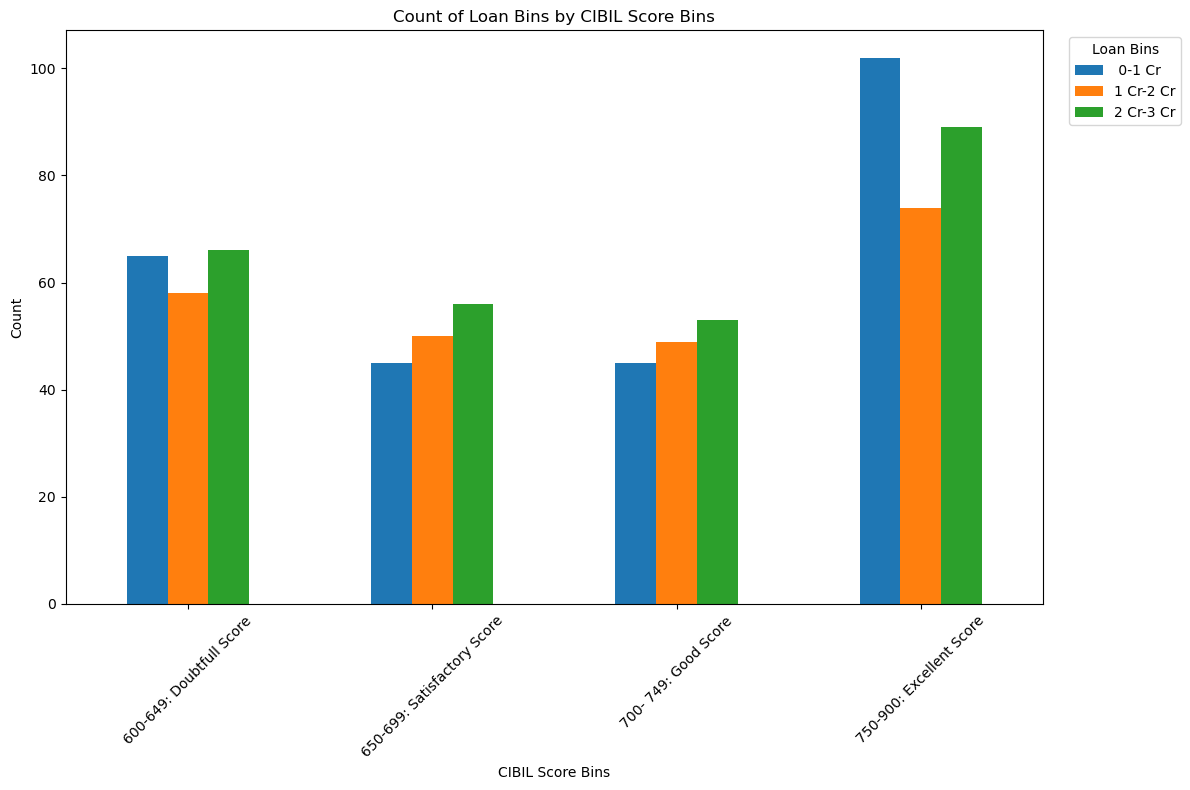

In [19]:
import matplotlib.pyplot as plt

# Group the data by CIBIL score bins and loan bins
grouped_data = df.groupby(['cibil_scorebins', 'Loan_bins']).size().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', figsize=(12, 8))
plt.xlabel('CIBIL Score Bins')
plt.ylabel('Count')
plt.title('Count of Loan Bins by CIBIL Score Bins')
plt.xticks(rotation=45)
plt.legend(title='Loan Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


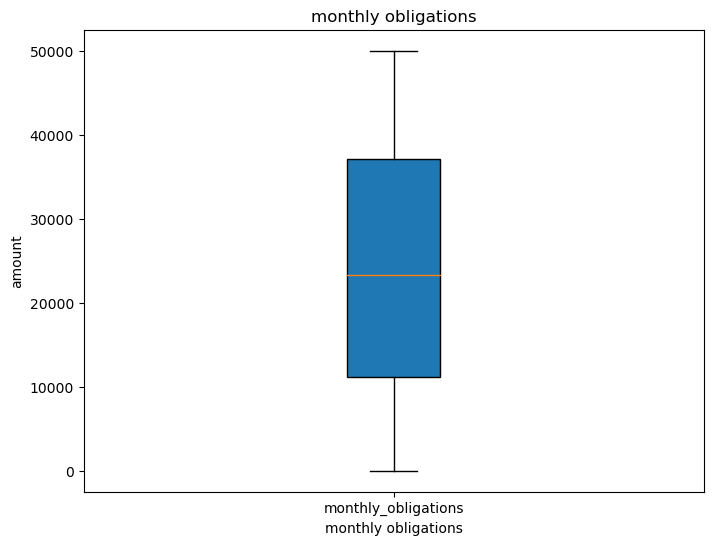

In [20]:
bplt.figure(figsize=(8, 6))

# Create the boxplot
boxplot = plt.boxplot([df['monthly_obligations']],
                      patch_artist=True,
                      labels=['monthly_obligations'])

# Set the title and axis labels
plt.title('monthly obligations')
plt.xlabel('monthly obligations')
plt.ylabel('amount')

# Show the plot
plt.show()



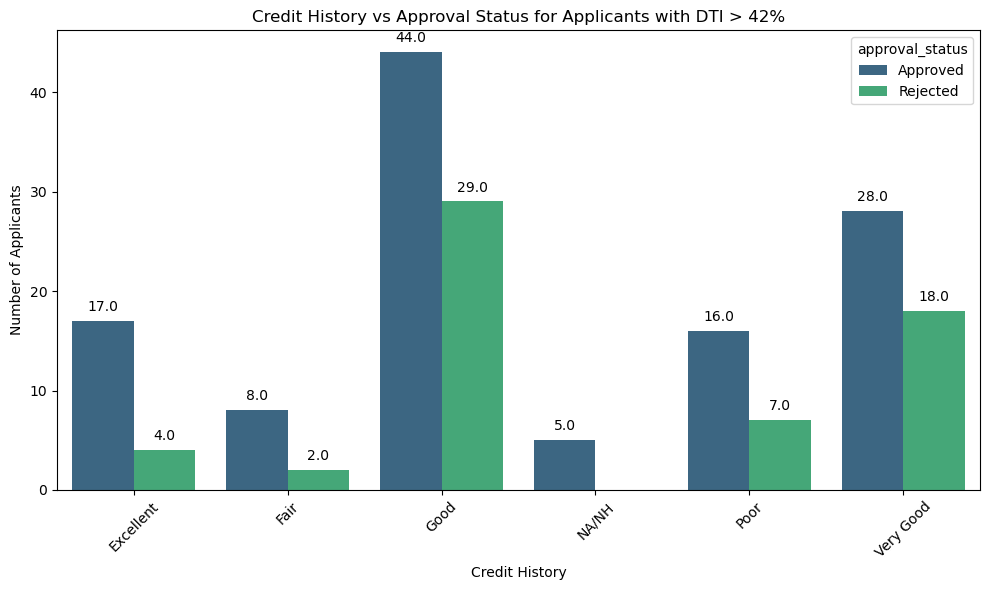

In [9]:
# Filter the DataFrame for DTI > 40
filtered_df = df[df['DTI'] > 40]

# Group by credit history and approval status to get the counts
credit_history_vs_approval = filtered_df.groupby(['credit_history', 'approval_status']).size().reset_index(name='counts')

# Plotting the bar chart for credit history with approval status for applicants with DTI > 42%
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=credit_history_vs_approval, x='credit_history', y='counts', hue='approval_status', palette='viridis')

# Set plot title and labels
plt.title('Credit History vs Approval Status for Applicants with DTI > 42%')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

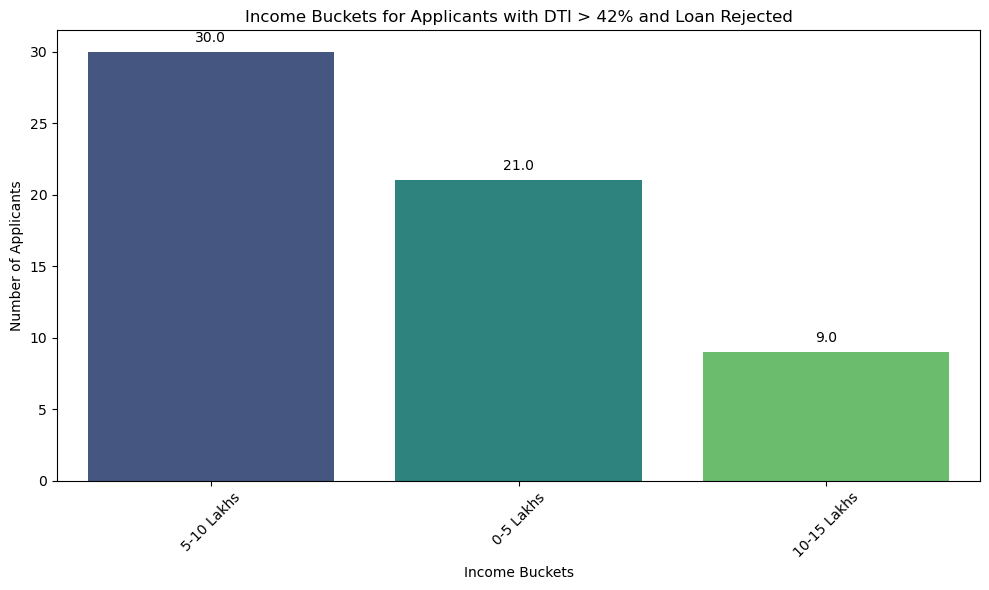

In [10]:
# Filter the DataFrame for DTI > 40 and approval status 'Rejected'
filtered_df = df[(df['DTI'] > 40) & (df['approval_status'] == 'Rejected')]

# Group by income buckets to get the counts
income_vs_counts = filtered_df['income_buckets'].value_counts().reset_index()
income_vs_counts.columns = ['income_buckets', 'counts']

# Plotting the bar chart for income buckets
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=income_vs_counts, x='income_buckets', y='counts', palette='viridis')

# Set plot title and labels
plt.title('Income Buckets for Applicants with DTI > 42% and Loan Rejected')
plt.xlabel('Income Buckets')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

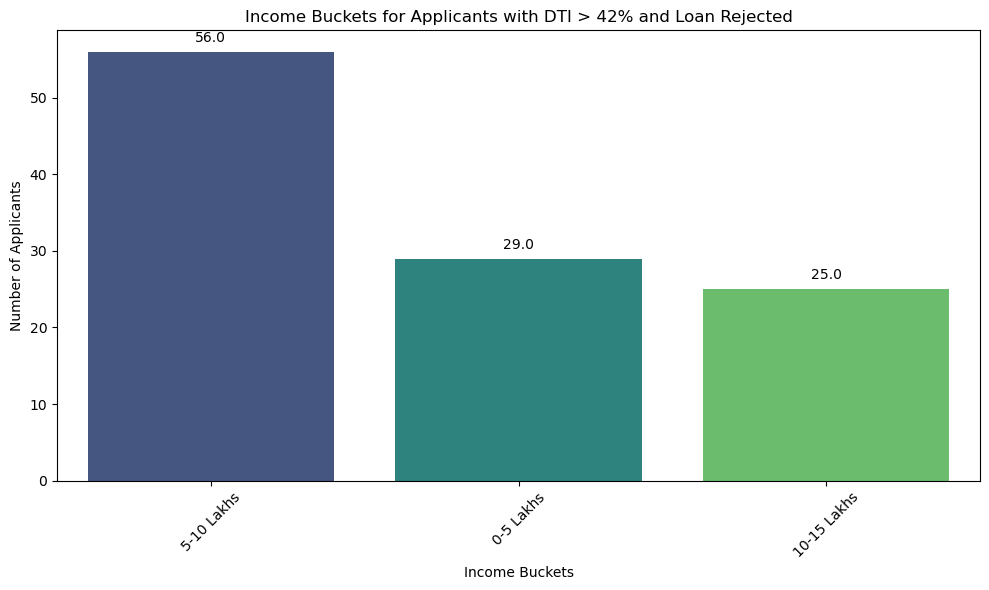

In [29]:
# Filter the DataFrame for DTI > 42 and approval status 'Rejected'
filtered_df = df[(df['DTI'] > 42) & (df['approval_status'] == 'Approved')]

# Group by income buckets to get the counts
income_vs_counts = filtered_df['income_buckets'].value_counts().reset_index()
income_vs_counts.columns = ['income_buckets', 'counts']

# Plotting the bar chart for income buckets
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=income_vs_counts, x='income_buckets', y='counts', palette='viridis')

# Set plot title and labels
plt.title('Income Buckets for Applicants with DTI > 42% and Loan Rejected')
plt.xlabel('Income Buckets')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

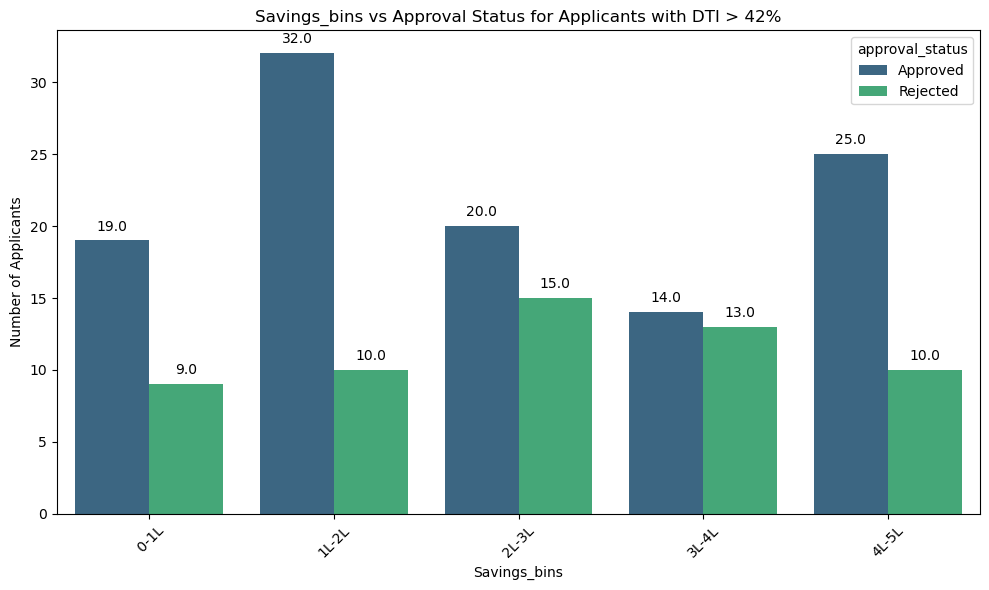

In [11]:
# Filter the DataFrame for DTI > 42
filtered_df = df[df['DTI'] > 42]

# Group by credit history and approval status to get the counts
credit_history_vs_approval = filtered_df.groupby(['Savings_bins', 'approval_status']).size().reset_index(name='counts')

# Plotting the bar chart for credit history with approval status for applicants with DTI > 42%
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=credit_history_vs_approval, x='Savings_bins', y='counts', hue='approval_status', palette='viridis')

# Set plot title and labels
plt.title('Savings_bins vs Approval Status for Applicants with DTI > 42%')
plt.xlabel('Savings_bins')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

In [39]:
# Separate data for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Descriptive statistics for DTI of approved applicants
approved_stats = approved_df['DTI'].describe()
print("Descriptive Statistics for Approved Applicants:")
print(approved_stats)

# Descriptive statistics for DTI of rejected applicants
rejected_stats = rejected_df['DTI'].describe()
print("\nDescriptive Statistics for Rejected Applicants:")
print(rejected_stats)


Descriptive Statistics for Approved Applicants:
count    506.000000
mean      29.466911
std       25.218445
min        0.032900
25%       11.539875
50%       24.179050
75%       38.863925
max      151.687500
Name: DTI, dtype: float64

Descriptive Statistics for Rejected Applicants:
count    246.000000
mean      32.887089
std       31.214858
min        0.176800
25%       11.481425
50%       26.354900
75%       39.035025
max      197.552100
Name: DTI, dtype: float64


In [35]:
# Separate data for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Descriptive statistics for DTI of approved applicants
approved_stats = approved_df['MonthlySalary'].describe()
print("Descriptive Statistics for Approved Applicants:")
print(approved_stats)

# Descriptive statistics for DTI of rejected applicants
rejected_stats = rejected_df['MonthlySalary'].describe()
print("\nDescriptive Statistics for Rejected Applicants:")
print(rejected_stats)

Descriptive Statistics for Approved Applicants:
count       506.000000
mean      99377.233202
std       40343.746221
min       25540.000000
25%       65065.750000
50%      102141.000000
75%      135766.750000
max      166436.000000
Name: MonthlySalary, dtype: float64

Descriptive Statistics for Rejected Applicants:
count       246.000000
mean      95748.995935
std       43155.773983
min       25246.000000
25%       54999.500000
50%       98430.500000
75%      134523.250000
max      166066.000000
Name: MonthlySalary, dtype: float64


In [36]:
# Separate data for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Descriptive statistics for DTI of approved applicants
approved_stats = approved_df['monthly_obligations'].describe()
print("Descriptive Statistics for Approved Applicants:")
print(approved_stats)

# Descriptive statistics for DTI of rejected applicants
rejected_stats = rejected_df['monthly_obligations'].describe()
print("\nDescriptive Statistics for Rejected Applicants:")
print(rejected_stats)

Descriptive Statistics for Approved Applicants:
count      506.000000
mean     24043.480237
std      14884.557958
min         46.000000
25%      11507.500000
50%      23101.500000
75%      37487.000000
max      49949.000000
Name: monthly_obligations, dtype: float64

Descriptive Statistics for Rejected Applicants:
count      246.000000
mean     24315.682927
std      14678.363632
min         84.000000
25%      10877.000000
50%      24086.000000
75%      37045.750000
max      49996.000000
Name: monthly_obligations, dtype: float64


In [37]:
# Separate data for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Descriptive statistics for DTI of approved applicants
approved_stats = approved_df['savings_account_balance'].describe()
print("Descriptive Statistics for Approved Applicants:")
print(approved_stats)

# Descriptive statistics for DTI of rejected applicants
rejected_stats = rejected_df['savings_account_balance'].describe()
print("\nDescriptive Statistics for Rejected Applicants:")
print(rejected_stats)

Descriptive Statistics for Approved Applicants:
count       506.000000
mean     246436.915020
std      144419.329073
min       11229.000000
25%      122568.000000
50%      245575.000000
75%      370207.750000
max      499760.000000
Name: savings_account_balance, dtype: float64

Descriptive Statistics for Rejected Applicants:
count       246.000000
mean     255741.016260
std      140892.996222
min       10837.000000
25%      135519.000000
50%      254232.500000
75%      382261.250000
max      499905.000000
Name: savings_account_balance, dtype: float64


In [38]:
# Separate data for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Descriptive statistics for DTI of approved applicants
approved_stats = approved_df['investment_portfolio_value'].describe()
print("Descriptive Statistics for Approved Applicants:")
print(approved_stats)

# Descriptive statistics for DTI of rejected applicants
rejected_stats = rejected_df['investment_portfolio_value'].describe()
print("\nDescriptive Statistics for Rejected Applicants:")
print(rejected_stats)

Descriptive Statistics for Approved Applicants:
count       506.000000
mean     487114.326087
std      280879.443523
min          59.000000
25%      241727.250000
50%      482551.000000
75%      733696.000000
max      999559.000000
Name: investment_portfolio_value, dtype: float64

Descriptive Statistics for Rejected Applicants:
count       246.000000
mean     524965.670732
std      263259.186165
min        1650.000000
25%      331832.500000
50%      513135.500000
75%      753108.750000
max      987551.000000
Name: investment_portfolio_value, dtype: float64


In [40]:
# Separate data for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Descriptive statistics for DTI of approved applicants
approved_stats = approved_df['investment_portfolio_value'].describe()
print("Descriptive Statistics for Approved Applicants:")
print(approved_stats)

# Descriptive statistics for DTI of rejected applicants
rejected_stats = rejected_df['investment_portfolio_value'].describe()
print("\nDescriptive Statistics for Rejected Applicants:")
print(rejected_stats)

Descriptive Statistics for Approved Applicants:
count       506.000000
mean     487114.326087
std      280879.443523
min          59.000000
25%      241727.250000
50%      482551.000000
75%      733696.000000
max      999559.000000
Name: investment_portfolio_value, dtype: float64

Descriptive Statistics for Rejected Applicants:
count       246.000000
mean     524965.670732
std      263259.186165
min        1650.000000
25%      331832.500000
50%      513135.500000
75%      753108.750000
max      987551.000000
Name: investment_portfolio_value, dtype: float64


how to analyse this -Despite having high investments, rejected applicants might be lacking in other important criteria, such as credit score or debt-to-income ratio.

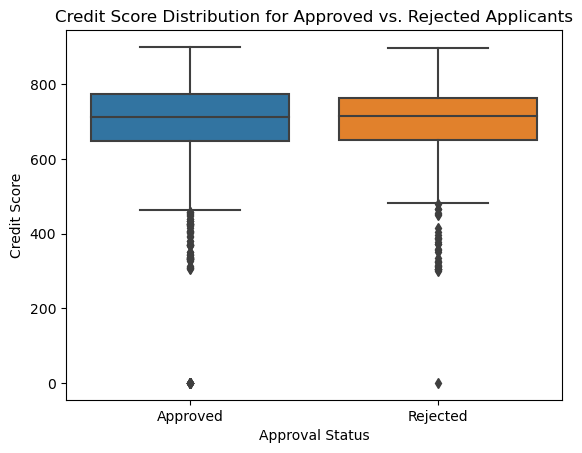

In [41]:
# Compare credit scores of approved and rejected applicants
sns.boxplot(x='approval_status', y='cibil_score', data=df)
plt.title('Credit Score Distribution for Approved vs. Rejected Applicants')
plt.xlabel('Approval Status')
plt.ylabel('Credit Score')
plt.show()


This box plot shows the distribution of credit scores for both approved and rejected applicants.

Key Observations:
Median (Middle Line in the Box):

Both the approved and rejected groups have similar median credit scores.
The median is slightly higher for approved applicants compared to rejected ones.
Interquartile Range (IQR - Box Part):

The box represents the range from the 25th percentile (lower boundary) to the 75th percentile (upper boundary).
The credit score range between the 25th and 75th percentiles is quite similar for both groups, indicating that the majority of applicants have comparable credit scores.
Whiskers and Outliers:

The whiskers extend to show the range of scores that are not considered outliers.
There are some outliers below 400 for both approved and rejected applicants, which could indicate poor credit scores.
Despite some low outliers, there are still applicants with very low credit scores that got approved.
Interpretation:
The distribution of credit scores for approved and rejected applicants is very similar.
The presence of outliers (very low credit scores) in both groups suggests that having a low credit score does not automatically lead to rejection.
This suggests that credit score may not be the sole factor influencing loan approval, and there may be other criteria at play, such as income, employment type, or DTI ratio

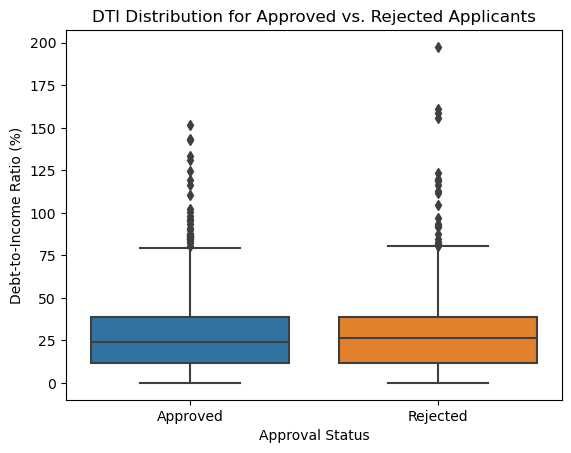

In [42]:
# Compare DTI ratio of approved and rejected applicants
sns.boxplot(x='approval_status', y='DTI', data=df)
plt.title('DTI Distribution for Approved vs. Rejected Applicants')
plt.xlabel('Approval Status')
plt.ylabel('Debt-to-Income Ratio (%)')
plt.show()


This box plot visualizes the debt-to-income ratio (DTI) distribution for approved vs. rejected applicants.

Key Observations:
Median (Middle Line in the Box):

The median DTI is similar for both approved and rejected applicants.
Both medians fall between 25% to 30%, indicating that most applicants, regardless of approval status, tend to have similar DTI values.
Interquartile Range (IQR - Box Part):

The IQR (the range from the 25th to the 75th percentile) for both approved and rejected applicants is also quite similar.
This suggests that the majority of applicants in both groups have comparable DTI ratios, typically between 10% and 50%.
Whiskers and Outliers:

The whiskers extend to show the range of DTI values without considering outliers.
There are outliers with very high DTI values (over 100%), indicating applicants who have more debt compared to their income.
The number of outliers in the rejected group is slightly higher compared to the approved group, especially for very high DTI values.
This suggests that applicants with a very high DTI ratio are more likely to be rejected.
Interpretation:
The distribution of DTI ratios for approved and rejected applicants is similar for the most part, with the median and IQR almost overlapping.
However, the higher occurrence of outliers (i.e., those with extremely high DTI ratios) in the rejected group indicates that those with higher DTI ratios are less likely to be approved.
This supports the idea that having a high DTI ratio might increase the chances of loan rejection since it indicates a high debt burden relative to income.

Correlation Matrix:
                             DTI  MonthlySalary  loan_amount  \
DTI                     1.000000      -0.523087     0.006534   
MonthlySalary          -0.523087       1.000000    -0.059988   
loan_amount             0.006534      -0.059988     1.000000   
credit_history_encoded -0.035899       0.030727    -0.078579   

                        credit_history_encoded  
DTI                                  -0.035899  
MonthlySalary                         0.030727  
loan_amount                          -0.078579  
credit_history_encoded                1.000000  


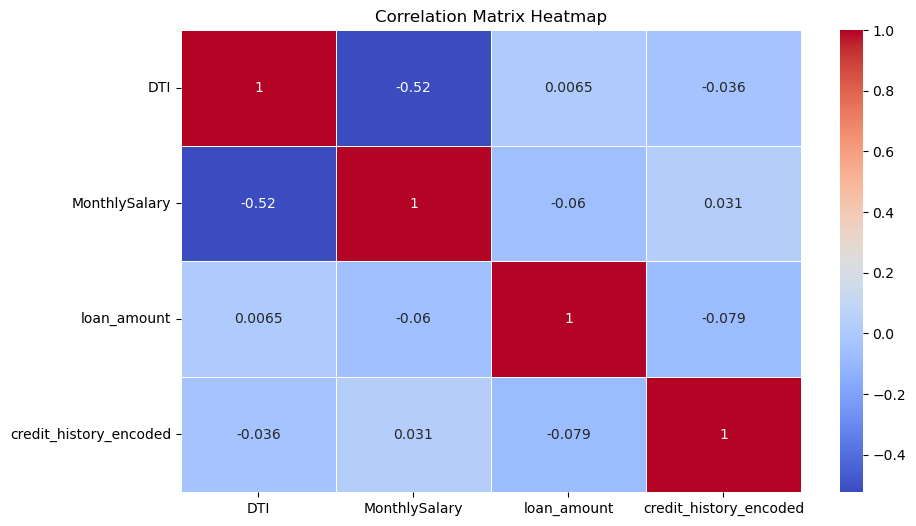

In [50]:

from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming df is your DataFrame containing loan information
# Step 1: Prepare the data (Optional: filter for rejected applications)
# Uncomment the line below if you want to filter for rejected applications
# df = df[df['approval_status'] == 'Rejected']

# Step 2: Encode categorical features
# Encode 'credit_history' (example: Good = 1, Bad = 0, etc.)
le = LabelEncoder()
df['credit_history_encoded'] = le.fit_transform(df['credit_history'])

# Step 3: Select relevant features for correlation analysis
features = ['DTI', 'MonthlySalary', 'loan_amount', 'credit_history_encoded']

# Step 4: Calculate correlation matrix
correlation_matrix = df[features].corr()

# Step 5: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 6: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


The correlation matrix you provided, along with the heatmap, shows the relationships between different features in your dataset. Let me summarize the findings:

DTI (Debt-to-Income Ratio)

MonthlySalary: The correlation coefficient is -0.52, indicating a moderately strong negative correlation. This means that as the monthly salary increases, DTI tends to decrease. A lower DTI often signifies better financial health, suggesting that people with higher incomes have lower debt obligations relative to their income.
Loan Amount: The correlation coefficient is 0.0065, which is very close to zero, indicating almost no correlation between DTI and the loan amount. This suggests that the size of the loan requested does not directly affect the DTI value.
Credit History: The correlation coefficient is -0.0359, indicating a very weak negative correlation. This means there is essentially no meaningful relationship between credit history and DTI.
MonthlySalary

Loan Amount: The correlation coefficient is -0.06, indicating a very weak negative correlation. This suggests that there is almost no relationship between the amount of salary someone earns and the loan amount they request.
Credit History: The correlation coefficient is 0.0307, also indicating a very weak positive correlation. This implies that credit history is not significantly affected by monthly salary.
Loan Amount

Credit History: The correlation coefficient is -0.0786, indicating a very weak negative correlation. Again, this shows that there isn't a meaningful relationship between the requested loan amount and the credit history.
Summary:
DTI and Monthly Salary are inversely related: Higher salary often leads to a lower DTI.
DTI and Loan Amount have no significant relationship.
Credit History does not have a strong correlation with any of the other features.
Insights:
The negative correlation between DTI and MonthlySalary suggests that individuals with higher incomes are generally better at managing their debt levels, leading to a lower DTI.
DTI does not significantly correlate with either loan amount or credit history, suggesting that other factors might be influencing loan approval decisions besides the debt-to-income ratio.
The heatmap visually confirms these relationships, with dark blue indicating a strong negative correlation, and lighter colors indicating weaker relationships. The darker blue color between DTI and MonthlySalary confirms the moderately strong negative correlation.

hypothesis testing

In [12]:
import pandas as pd
from scipy.stats import ttest_ind
# Split the data into approved and rejected applicants based on approval status
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Extract DTI values for each group
dti_approved = approved_df['DTI']
dti_rejected = rejected_df['DTI']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(dti_approved, dti_rejected, equal_var=False)

# Display the results
print(f"T-Test Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean DTI between approved and rejected applicants.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean DTI between approved and rejected applicants.")


T-Test Statistic: -1.4973012147749654
P-Value: 0.1350931414677446
Fail to reject the null hypothesis: There is no significant difference in mean DTI between approved and rejected applicants.


In [53]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a new categorical column for DTI category
df['DTI_category'] = df['DTI'].apply(lambda x: '< 42%' if x < 42 else '> 42%')

# Create a contingency table for DTI_category and approval_status
contingency_table = pd.crosstab(df['DTI_category'], df['approval_status'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Interpretation of the result
if p_value < alpha:
    print("Reject the null hypothesis: There is an association between DTI category and approval status.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between DTI category and approval status.")


Contingency Table:
approval_status  Approved  Rejected
DTI_category                       
< 42%                 396       189
> 42%                 110        57

Chi-Square Statistic: 0.12224483559057252
P-Value: 0.7266124233803144
Fail to reject the null hypothesis: There is no significant association between DTI category and approval status.
